Imported the dataset from a github Src

In [1]:
!git clone 'https://github.com/Shenggan/BCCD_Dataset.git'

Cloning into 'BCCD_Dataset.git''...
fatal: protocol ''https' is not supported


Extracted Data Labels from .XML files and stored it into .CSV files

In [2]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [3]:
annotations = sorted(glob('/content/BCCD_Dataset/BCCD/Annotations/*.xml'))

df = []
cnt = 0
for file in annotations:
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  filename = str(cnt) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('/content/blood_cell_detection.csv', index=False)


OSError: Cannot save file into a non-existent directory: '\content'

In [ ]:
img_width = 640
img_height = 480

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv('/content/blood_cell_detection.csv')

le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['Platelets' 'RBC' 'WBC']


,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,BloodImage_00000.jpg,0.jpg,WBC,260,491,177,376,2,231,199,375,276,0.585938,0.360938,0.575000,0.414583
1,BloodImage_00000.jpg,0.jpg,RBC,78,184,336,435,1,106,99,131,385,0.204687,0.165625,0.802083,0.206250
2,BloodImage_00000.jpg,0.jpg,RBC,63,169,237,336,1,106,99,116,286,0.181250,0.165625,0.595833,0.206250
3,BloodImage_00000.jpg,0.jpg,RBC,214,320,362,461,1,106,99,267,411,0.417187,0.165625,0.856250,0.206250
4,BloodImage_00000.jpg,0.jpg,RBC,414,506,352,445,1,92,93,460,398,0.718750,0.143750,0.829167,0.193750
5,BloodImage_00000.jpg,0.jpg,RBC,555,640,356,455,1,85,99,597,405,0.932813,0.132812,0.843750,0.206250
6,BloodImage_00000.jpg,0.jpg,RBC,469,567,412,480,1,98,68,518,446,0.809375,0.153125,0.929167,0.141667
7,BloodImage_00000.jpg,0.jpg,RBC,1,87,333,437,1,86,104,44,385,0.068750,0.134375,0.802083,0.216667
8,BloodImage_00000.jpg,0.jpg,RBC,4,95,406,480,1,91,74,49,443,0.076563,0.142187,0.922917,0.154167
9,BloodImage_00000.jpg,0.jpg,RBC,155,247,74,174,1,92,100,201,124,0.314063,0.143750,0.258333,0.208333


Splitting into training and validation datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=13, shuffle=True)
df_train, df_valid = train_test_split(df_train, test_size=0.2, random_state=13, shuffle=True)

print(df_train.shape, df_valid.shape, df_test.shape)

(3519, 16) (880, 16) (489, 16)


Data segregation and moving to it's corresponding folders

In [ ]:
os.mkdir('/content/data/')
os.mkdir('/content/data/images/')
os.mkdir('/content/data/images/train/')
os.mkdir('/content/data/images/valid/')

os.mkdir('/content/data/labels/')
os.mkdir('/content/data/labels/train/')
os.mkdir('/content/data/labels/valid/')

In [ ]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)

  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

In [ ]:
%%time
src_img_path = "/content/BCCD_Dataset/BCCD/JPEGImages/"
src_label_path = "/content/BCCD_Dataset/BCCD/Annotations/"

train_img_path = "/content/data/images/train"
train_label_path = "/content/data/labels/train"

valid_img_path = "/content/data/images/valid"
valid_label_path = "/content/data/labels/valid"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

CPU times: user 2.06 s, sys: 215 ms, total: 2.27 s
Wall time: 3.62 s


In [ ]:
print("No. of Training images", len(os.listdir('/content/data/images/train')))
print("No. of Training labels", len(os.listdir('/content/data/labels/train')))

print("No. of valid images", len(os.listdir('/content/data/images/valid')))
print("No. of valid labels", len(os.listdir('/content/data/labels/valid')))

No. of Training images 363
No. of Training labels 363
No. of valid images 326
No. of valid labels 326


Yolo Installing and Cloning the V5 model

In [ ]:
!mkdir -p '/content/Projects/YOLO/'
!cp -r '/content/data' '/content/Projects/YOLO/'

In [ ]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 16977, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 16977 (delta 89), reused 110 (delta 54), pack-reused 16805 (from 1)
Receiving objects: 100% (16977/16977), 15.71 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (11627/11627), done.


In [ ]:
!pip install -qr '/content/yolov5/requirements.txt'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.1 MB/s eta 0:00:00


Edited data.yaml File

In [ ]:
!echo -e 'train: /content/data/images/train\nval: /content/data/images/valid\n\nnc: 3\nnames: ['Platelets', 'RBC', 'WBC']' >> data.yaml
!cat 'data.yaml'

train: /content/data/images/train
val: /content/data/images/valid

nc: 3
names: [Platelets, RBC, WBC]


In [ ]:
shutil.copyfile('/content/data.yaml', '/content/yolov5/data.yaml')

'/content/yolov5/data.yaml'

Edited Number of Class

In [ ]:
!sed -i 's/nc: 80/nc: 3/g' ./yolov5/models/yolov5s.yaml

Training the model

In [ ]:
%%time

!python yolov5/train.py --img 640 --batch 8 --epochs 10 --data /content/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --name result

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-10-11 03:48:56.584116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 03:48:56.667000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 03:48:56.695564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5/yolov5s.pt, cfg=/content/yolov5/

In [ ]:
!python yolov5/detect.py

detect: weights=yolov5/yolov5s.pt, source=yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 337.8ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 276.0ms
Speed: 1.7ms pre-process, 306.9ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


In [ ]:
# os.mkdir('OUTPUTS')

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/result/weights/best.pt --source /content/data/images/valid/

detect: weights=['yolov5/runs/train/result/weights/best.pt'], source=/content/data/images/valid/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/326 /content/data/images/valid/BloodImage_00000.jpg: 480x640 17 RBCs, 1 WBC, 322.2ms
image 2/326 /content/data/images/valid/BloodImage_00001.jpg: 480x640 17 RBCs, 1 WBC, 279.0ms
image 3/326 /content/data/images/valid/BloodImage_00002.jpg: 480x640 1 Platelets, 15 RBCs, 1 WBC, 290.3ms
image 4/326 

Delete an Folder

In [ ]:
# import os
# import shutil
# folder_path = "/content/yolov5/runs/detect/exp"  # Replace with the actual path to the folder
# shutil.rmtree(folder_path)

In [ ]:
# ## Add the path where you have stored the neccessary supporting files to run detect.py ##
# sys.path.insert(0, '/content/Projects/YOLO/SOURCE/')
# print(sys.path)
# cwd = os.getcwd()
# print(cwd)

['/content/Projects/YOLO/SOURCE/', '/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']
/content


Saved the output data in RUN -> DETECT Folder

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/result/weights/best.pt --source "/content/Projects/YOLO/data/images/valid" --save-txt --save-conf --save-crop

detect: weights=['yolov5/runs/train/result/weights/best.pt'], source=/content/Projects/YOLO/data/images/valid, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/326 /content/Projects/YOLO/data/images/valid/BloodImage_00000.jpg: 480x640 17 RBCs, 1 WBC, 315.9ms
image 2/326 /content/Projects/YOLO/data/images/valid/BloodImage_00001.jpg: 480x640 17 RBCs, 1 WBC, 291.7ms
image 3/326 /content/Projects/YOLO/data/images/valid/BloodImage_00002.jpg: 480x6

Checked the Single Image

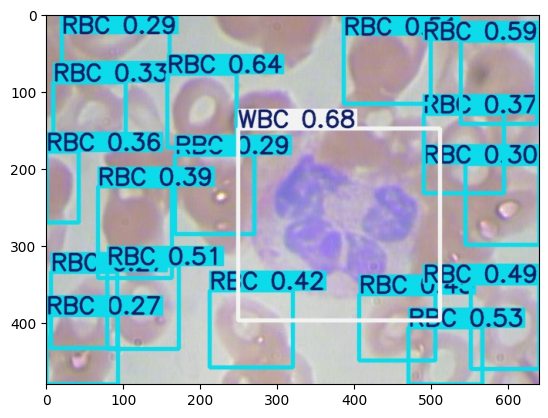

In [ ]:
import matplotlib.pyplot as plt
image_path = "/content/yolov5/runs/detect/exp3/BloodImage_00000.jpg"  # Replace with the actual path to your image
plt.imshow(plt.imread(image_path))
plt.show()

Checked Whole folder with how many images wanted to see

How many images do you want to display? 4


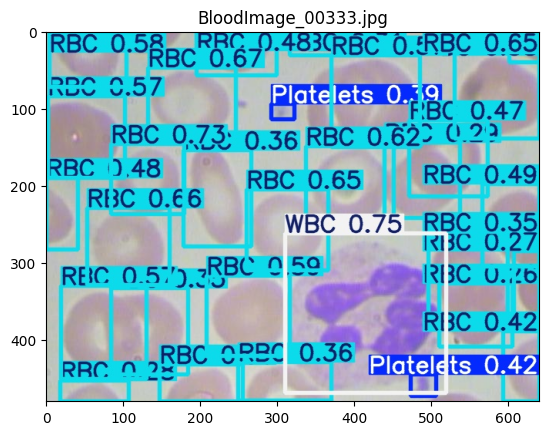

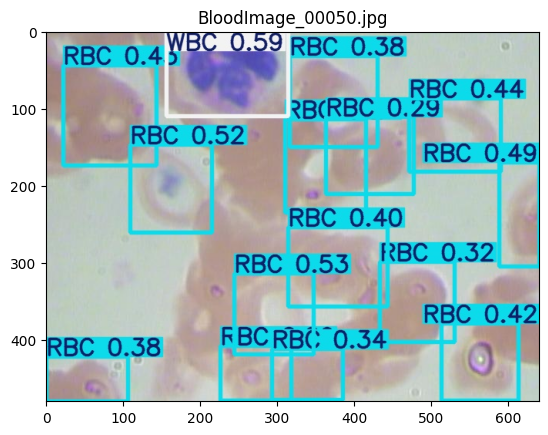

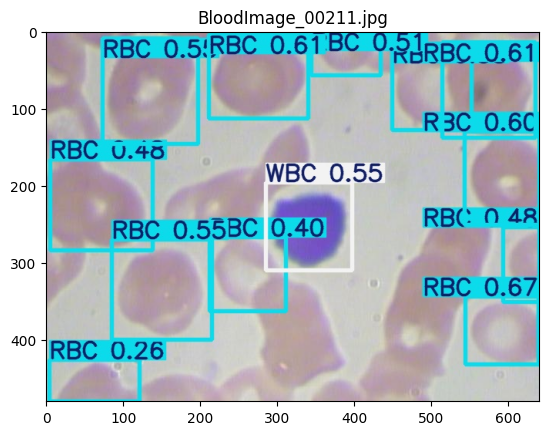

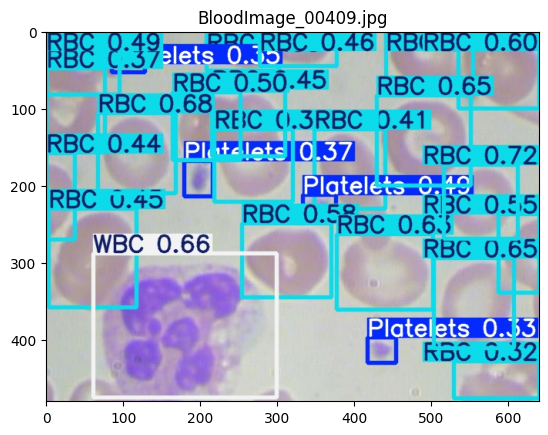

In [ ]:
import matplotlib.pyplot as plt
import os

def display_images_in_folder(folder_path, num_images_to_display):

  image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

  for i, image_file in enumerate(image_files):
    if i >= num_images_to_display:
      break

    image_path = os.path.join(folder_path, image_file)
    plt.figure()
    plt.imshow(plt.imread(image_path))
    plt.title(image_file)
    plt.show()

folder_path = '/content/yolov5/runs/detect/exp3'

num_images_to_display = int(input("How many images do you want to display? "))

display_images_in_folder(folder_path, num_images_to_display)

Counting the Boxes with respect to classes

In [ ]:
import torch
from PIL import Image
import matplotlib
# Use a backend that doesn't require a GUI
matplotlib.use('Agg')  # Change the backend to 'Agg'
import matplotlib.pyplot as plt

# Load the YOLOv5 model using torch.hub
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/result/weights/best.pt')

# Import the necessary libraries for image loading and manipulation.
from PIL import Image

# Load the image using PIL.
img = Image.open("/content/Projects/YOLO/data/images/valid/BloodImage_00000.jpg")

# Plot the image using matplotlib
# plt.ion() # Enable interactive mode if using fig.show() later - Not needed with 'Agg' backend
# plt.imshow(img)
# plt.title("Original Image")

# Save the figure to a variable
# fig = plt.gcf()

# Display the plot now or save it later
# plt.show()  # Avoid using plt.show() with 'Agg' backend, save the figure instead
# fig.savefig("my_plot.png")  # Save the plot to a file
# # Display the image from the saved file
# from IPython.display import Image
# display(Image(filename="my_plot.png"))

# Perform inference
results = model(img)

# Render the detections on the image
annotated_image = results.render()[0]  # Get the annotated image as a NumPy array

# Display the annotated image
plt.imshow(annotated_image)
plt.title("Annotated Image")
plt.show()

# Perform inference by passing the loaded image directly to the model.
results = model(img, size=640)  # Remove 'conf' argument here

# Filter detections based on confidence threshold
detections = results.xyxy[0]  # Access detections for the first image in the batch.
filtered_detections = detections[detections[:, 4] >= 0.25] # Apply confidence threshold

# Get class names for filtered detections
classname = [model.names[int(cls)] for cls in filtered_detections[:, 5]]
classname

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-10-11 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureW

['WBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC']

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-11 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


array([[[176, 154, 143],
        [176, 154, 143],
        [176, 153, 145],
        ...,
        [190, 197, 203],
        [188, 195, 201],
        [186, 193, 199]],

       [[176, 154, 143],
        [176, 154, 143],
        [176, 153, 145],
        ...,
        [190, 197, 203],
        [188, 195, 201],
        [186, 193, 199]],

       [[174, 155, 141],
        [174, 155, 141],
        [174, 154, 143],
        ...,
        [190, 198, 201],
        [188, 196, 199],
        [186, 194, 197]],

       ...,

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [159, 203, 206],
        ...,
        [162, 124, 185],
        [166, 125, 191],
        [172, 131, 197]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [128, 206, 212],
        ...,
        [161, 121, 184],
        [164, 123, 191],
        [169, 128, 196]],

       [[ 11, 219, 235],
        [ 11, 219, 235],
        [ 11, 219, 235],
        ...,
        [160, 120, 183],
        [163, 122, 190],
        [168, 127, 197]]], dtype=uint8)
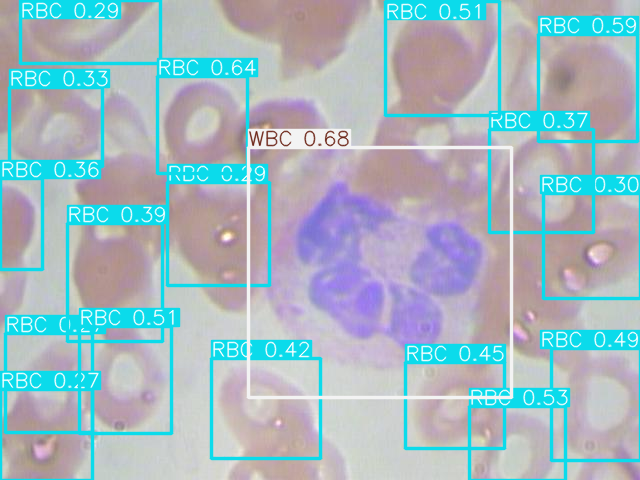

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


WBC:1,RBC:17


In [ ]:
import torch
from PIL import Image
from IPython.display import display

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/result/weights/best.pt')

# Load the image
img = Image.open("/content/Projects/YOLO/data/images/valid/BloodImage_00000.jpg")

# Perform inference
results = model(img)

# Render the detections on the image
results.render()  # Render the detections on the image

annotated_image = results.ims[0]
display(annotated_image)  # results.ims[0] contains the annotated image

# Perform inference by passing the loaded image directly to the model.
results = model(img, size=640)  # Remove 'conf' argument here

# Filter detections based on confidence threshold
detections = results.xyxy[0]  # Access detections for the first image in the batch.
filtered_detections = detections[detections[:, 4] >= 0.25] # Apply confidence threshold

# Get class names for filtered detections
classname = [model.names[int(cls)] for cls in filtered_detections[:, 5]]
classname

from collections import Counter
count = Counter(classname)
detection_str = ','.join([f"{name}:{count}" for name, count in count.items()])
print(detection_str)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [ ]:
import gradio as gr
import cv2
import torch
from PIL import Image
from collections import Counter
import io
import numpy as np

# Load model efficiently (outside the predict function)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/result/weights/best.pt', force_reload=False)

image_counter = 0

def predict(image):
    global image_counter
    image_counter += 1

    # Convert NumPy array to PIL Image
    image = Image.fromarray(image.astype('uint8'), 'RGB')

    results = model(image, size=640)
    annotated_image = Image.fromarray(results.render()[0])
    detections = results.xyxy[0]
    filtered_detections = detections[detections[:, 4] >= 0.25]
    classname = [model.names[int(cls)] for cls in filtered_detections[:, 5]]
    count = Counter(classname)
    detection_str = ','.join([f"{name}:{count}" for name, count in count.items()])
    return annotated_image, detection_str

# def predict(image):
#     global image_counter  # Corrected the typo here
#     image_counter += 1

#     # Perform detection
#     results = model(image, size=640)  # Pass the 'image' argument to model()
#     # ...

#     # Save the annotated image with a unique filename
#     annotated_image_path = f"latest_annotated_image_{image_counter}.jpg"
#     annotated_image.save(annotated_image_path)

#     # Get the annotated image as a NumPy array
#     annotated_image_np = np.array(results.render()[0])

#     # Convert to byte stream to force Gradio refresh
#     buffered = io.BytesIO()
#     Image.fromarray(annotated_image_np).save(buffered, format="JPEG")
#     img_str = buffered.getvalue()

#     # Filter detections and count objects
#     detections = results.xyxy[0]
#     filtered_detections = detections[detections[:, 4] >= 0.25]
#     classname = [model.names[int(cls)] for cls in filtered_detections[:, 5]]
#     count = Counter(classname)

#      # Format detection counts
#     detection_str = ','.join([f"{name}:{count}" for name, count in count.items()])

#     return img_str, detection_str  # Return img_str instead of annotated_image_np

# Define Gradio interface with image and text output
app = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="numpy", label="Upload an Image"),
    outputs=[
        gr.Image(type="numpy", label="Annotated Image"),
        gr.Textbox(label="Detection Counts")
    ],
    title="Blood Cell Counting",
    description="Upload an image, and the model will detect cells and show the count."
)

app.launch(debug=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-11 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://28539c18aa94900c5a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
